### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from sklearn import datasets

Using TensorFlow backend.


In [2]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [3]:
#觀察資料描述
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

[ 0.  0.  1. 14.  2.  0.  0.  0.  0.  0.  0. 16.  5.  0.  0.  0.  0.  0.
  0. 14. 10.  0.  0.  0.  0.  0.  0. 11. 16.  1.  0.  0.  0.  0.  0.  3.
 14.  6.  0.  0.  0.  0.  0.  0.  8. 12.  0.  0.  0.  0. 10. 14. 13. 16.
  8.  3.  0.  0.  2. 11. 12. 15. 16. 15.]
Label is： 1


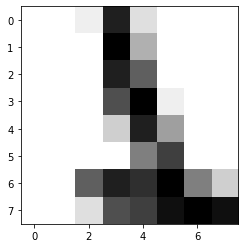

In [15]:
i=1000
print(digits.data[i])
print("Label is：", digits.target[i])
plt.imshow(digits.data[i].reshape(8,8),cmap='binary')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier #手寫辨識資料集適用分類模型

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.1, random_state=42)

clf = GradientBoostingClassifier(loss="deviance", #Loss 的選擇，若改為 exponential 則會變成 Adaboosting 演算法，概念相同但實作稍微不同
                                 learning_rate=0.1, #每棵樹對最終結果的影響，應與 n_estimators 成反比
                                 n_estimators=200 #決策樹的數量
                                )

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

print('Train acc(交叉驗證平均)：', cross_val_score(clf, x_train, y_train, cv=5).mean())
print('Test acc：', accuracy_score(y_test, clf.predict(x_test)))

Train acc(交叉驗證平均)： 0.9665940450254176
Test acc： 0.9722222222222222


In [26]:
#測試隨機森林在此資料集上的效果
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, #決策樹的數量
                             criterion="gini",
                             max_features="auto",
                             min_samples_split=2,
                             min_samples_leaf=1, 
                             random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print('Train acc(交叉驗證平均)：', cross_val_score(clf, x_train, y_train, cv=5).mean())
print('Test acc：', accuracy_score(y_test, clf.predict(x_test)))

Train acc(交叉驗證平均)： 0.9734109238237204
Test acc： 0.9777777777777777


### 筆記

Gradient Boosting Machine：

    由後面生成的樹，利用計算梯度來修正前面樹學不好的地方，並乘上 learning rate 讓後面的樹能有更多學習的空間，速度較決策樹與隨機森林慢，但不容易overfitting。

隨機森林：

    每棵樹是獨立的，前一棵樹的結果不會影響到下一棵樹。